In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mode1 = pd.read_excel('mode1.xlsx')
mode2 = pd.read_excel('mode2.xlsx')

In [4]:
mode2.head()

,X1,X2
0,107.705,95.795
1,85.020,235.536
2,154.556,125.419
3,119.904,194.497
4,131.874,124.638


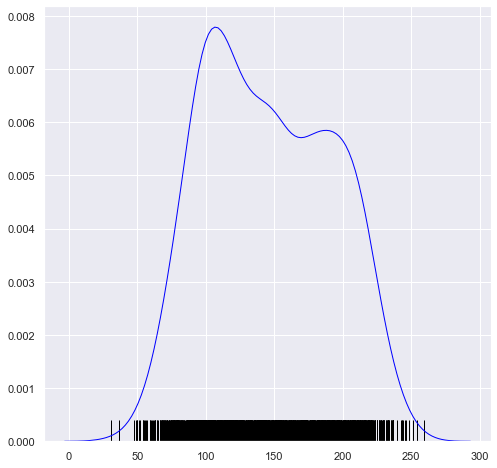

In [9]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.distplot(mode1, hist = False, kde = True, rug = True,
             color = 'blue', 
             kde_kws={'linewidth': 1},
             rug_kws={'color': 'black'})

n = 1, k = 1
n = 4, k = 2
n = 25, k = 5
n = 49, k = 7


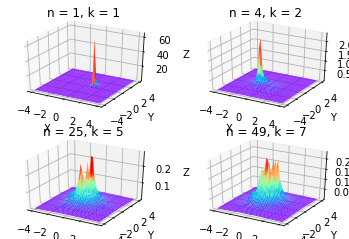

<Figure size 720x720 with 0 Axes>

<class 'numpy.ndarray'>


In [6]:
import math
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


MU = np.zeros(2)
COV = np.eye(2)

def getData(size):
    data = np.random.multivariate_normal(MU, COV, size)
    return data

def area(data):
    size = 40
    X = []
    for i in range(data.shape[1]):
        x=np.linspace(-4, 4, size)
        X.append(x)
    return np.array(X)

def knn(data, k):
    X = area(data)
    size = [len(X[0]), len(X[1])]
    knnpdf = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            x = np.array([X[0][i],X[1][j]])
            ds = [np.linalg.norm(x-y) for y in data]
            ds.sort()
            v = math.pi*ds[k-1]*ds[k-1]
            if v == 0:
                knnpdf[i,j] = 1
            else:
                knnpdf[i,j] = k/(n*v)
    return X, knnpdf
  
n_set = [1, 4, 25, 49]
fig = plt.figure()
plt.figure(figsize=(10,10))
pos = 1

for n in n_set :
    k = int(math.sqrt(n))
    s = "n = %d, k = %d" % (n, k)
    print(s)
    data = getData(n)
    X,P = knn(data, k)
    ax = fig.add_subplot(len(n_set)/2, 2, pos, projection='3d')
    pos = pos + 1
    px, py = np.meshgrid(X[0], X[1])
    ax.plot_surface(px, py, P, cmap='rainbow')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_title(s)
        
plt.show()

data = getData(3)
print(type(data))

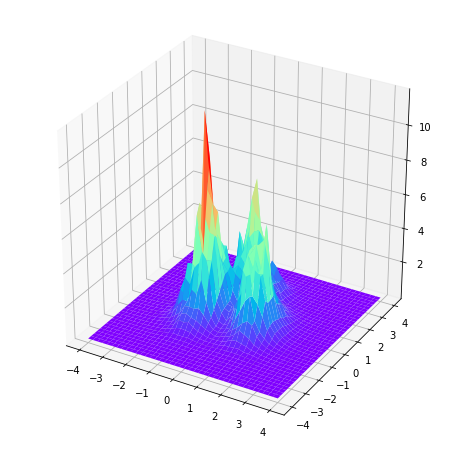

In [7]:
data = pd.read_excel('mode2.xlsx')
data1 = data.to_numpy()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data1 = sc.fit_transform(data1)
k = 16

X,P = knn(data1, k)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
px, py = np.meshgrid(X[0], X[1])
ax.plot_surface(px, py, P, cmap='rainbow',linewidth=0)
plt.show()

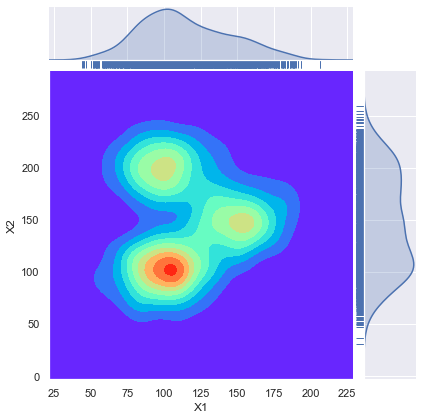

In [8]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.jointplot(x='X1',y='X2',data=data,cmap='rainbow',kind='kde').plot_marginals(sns.rugplot, cmap='rainbow',height=-.15, clip_on=False)